In [1]:
using StateSpaceDynamics, Plots


In [2]:
model = initialize_slds()

SwitchingLinearDynamicalSystem([0.96 0.04; 0.04 0.96], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.001 0.0; 0.0 0.001], [0.0, 0.0], [0.001 0.0; 0.0 0.001]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.86383255548

In [55]:
T = 4000
# Generate synthetic data
x, y, z = sample(model, T)


([0.03757824168889294 0.0686394370418223 … -0.05531306572426513 0.029410635721255754; 0.00853497387820134 0.0035668637309811905 … -0.013691305991967051 -0.024646351686064275], [0.0148222950313273 -0.027935889203929504 … 0.015890666329821668 -0.01602684567638802; 0.040024773456078536 -0.01988948551607355 … 0.011980642464672064 0.012693225038434761; … ; -0.05178277087764044 -0.0743144311709812 … 0.10008341885899578 -0.02736772545646268; 0.012011795563390607 0.0801674117921993 … -0.0580303588156387 -0.011835110625919836], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

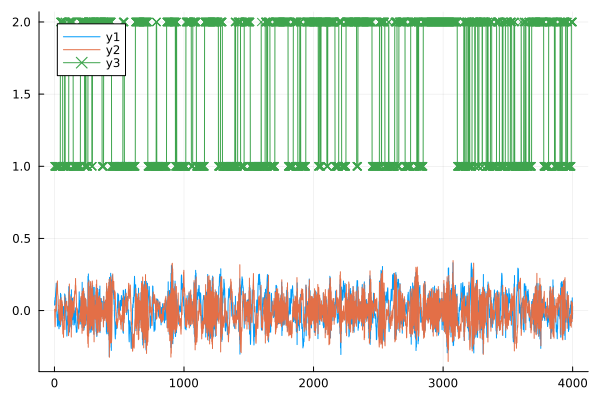

In [56]:
plot(x')
plot!(z, marker=:x)

In [102]:
using LinearAlgebra

p = model.B[1].obs_dim
d = model.B[1].latent_dim

K = model.K
A = [0.9 0.1; 0.2 0.8]
A ./= sum(A, dims=2) # Normalize rows to sum to 1

πₖ = rand(K)
πₖ ./= sum(πₖ) # Normalize to sum to 1

Q = Matrix(0.5 * I(d))

x0 = [0.0; 0.0]
P0 = Matrix(0.5 * I(d))

# set up the observation parameters
#C = randn(p, d)
#R = Matrix(0.001 * I(p))

C = model.B[1].obs_model.C
R = model.B[1].obs_model.R

#B = [StateSpaceDynamics.LinearDynamicalSystem(
#    StateSpaceDynamics.GaussianStateModel(0.95 * [cos(f) -sin(f); sin(f) cos(f)], Q, x0, P0),
#    StateSpaceDynamics.GaussianObservationModel(C, R),
#    d, p, fill(true, 6  )) for (i,f) in zip(1:K, [0.5, 0.5])]

B = [StateSpaceDynamics.LinearDynamicalSystem(
    StateSpaceDynamics.GaussianStateModel(model.B[i].state_model.A, model.B[i].state_model.Q, x0, P0),
    StateSpaceDynamics.GaussianObservationModel(C, R),
    d, p, fill(true, 6  )) for (i,f) in zip(1:K, [0.5, 0.5])]

    model.B[1].state_model.A

modeli = SwitchingLinearDynamicalSystem(A, B, πₖ, model.K)

SwitchingLinearDynamicalSystem([0.9 0.1; 0.2 0.8], StateSpaceDynamics.LinearDynamicalSystem[StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([0.9452539570141245 -0.09484174581448675; 0.09484174581448675 0.9452539570141245], [0.5 0.0; 0.0 0.5], [0.0, 0.0], [0.5 0.0; 0.0 0.5]), StateSpaceDynamics.GaussianObservationModel{Float64}([-0.31498797116895605 0.4338858743048611; -0.31125240132442067 -0.3954398407537453; … ; -0.8253345499750688 -0.9654904870197227; 0.840288523245819 0.9656607495563969], [0.001 0.0 … 0.0 0.0; 0.0 0.001 … 0.0 0.0; … ; 0.0 0.0 … 0.001 0.0; 0.0 0.0 … 0.0 0.001]), 2, 10, Bool[1, 1, 1, 1, 1, 1]), StateSpaceDynamics.LinearDynamicalSystem{StateSpaceDynamics.GaussianStateModel{Float64}, StateSpaceDynamics.GaussianObservationModel{Float64}}(StateSpaceDynamics.GaussianStateModel{Float64}([-0.39533949471978524 -0.8638325554843976; 0.863

In [103]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [104]:
modeli.A

2×2 Matrix{Float64}:
 0.9  0.1
 0.2  0.8

In [105]:
mls, param_diff, FB, FS = fit!(modeli, y; max_iter=1)

([-22208.41367349668], [2.152433019377431], StateSpaceDynamics.ForwardBackward{Float64}([-5.833886350518183 -4.5744036694424235 … -5.9643232509204775 -4.634009614663814; -6.177336125537863 -5.228901972615256 … -7.460618284043177 -6.13205597603123], [-6.445064473180619 -11.000121906020357 … -22203.711414648675 -22208.443962296977; -6.959776073368631 -12.221908523463313 … -22207.19145601191 -22211.925756933608], [-22202.167572005532 -22197.50677089776 … -4.714832922549853 0.0; -22203.16636651539 -22198.61081298447 … -5.604616094597777 0.0], [-0.19896298318053596 -0.09321930824808078 … -0.012574074546137126 -0.030288800295238616; -1.7124690932287194 -2.4190480124016176 … -4.382398609832308 -3.512083436926332], [-0.21792606050803442 -4.173691027728637; -2.2367150574718835 -2.608961086236377;;; -0.10737263500413974 -4.358093201095471; -2.8332366492213623 -3.5004382768602227;;; -0.055409220498404466 -4.517602107080165; -3.494224255624431 -4.372898203750083;;; … ;;; -0.016049942725658184 -4.9

In [106]:
param_diff

1-element Vector{Float64}:
 2.152433019377431

In [107]:
model.A

2×2 Matrix{Float64}:
 0.96  0.04
 0.04  0.96

In [108]:
modeli.A

2×2 Matrix{Float64}:
 0.993189  0.00681128
 0.800468  0.199532

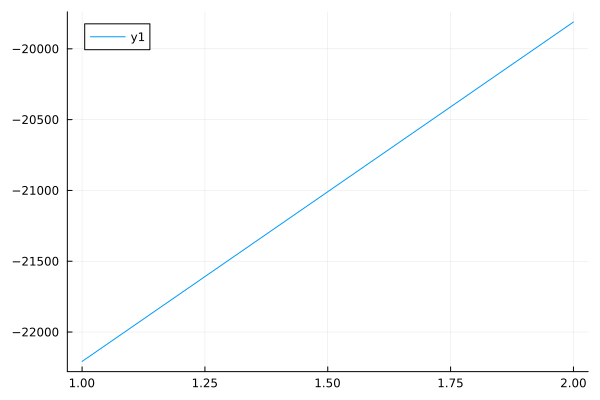

In [98]:
plot(mls)

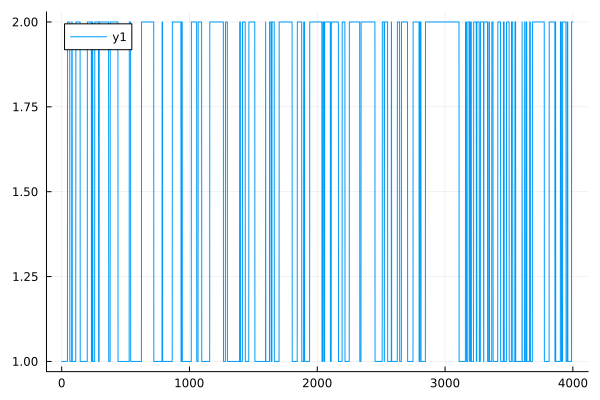

In [99]:
plot(z)

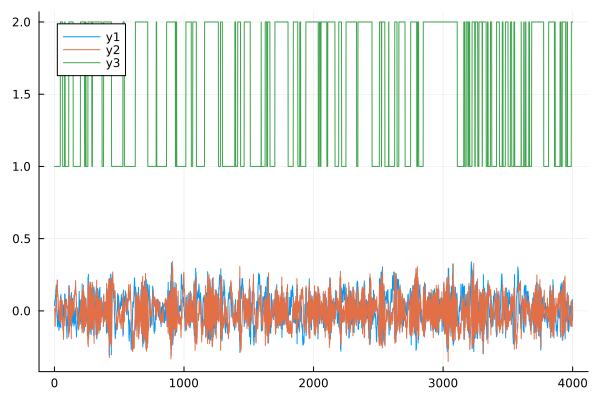

In [100]:
plot(FS[1].x_smooth')
plot!(z)

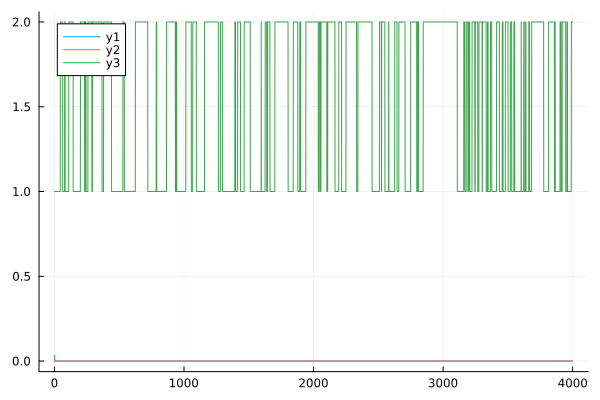

In [101]:
plot(FS[2].x_smooth')
plot!(z)

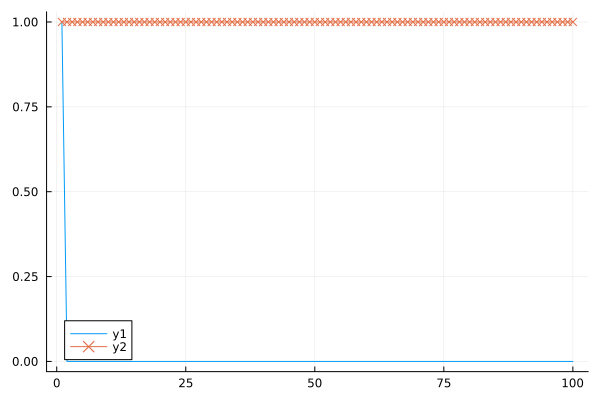

In [48]:
plot(exp.(FB.γ)'[1:100,2])
plot!(z[1:100] .- 1, marker=:x)

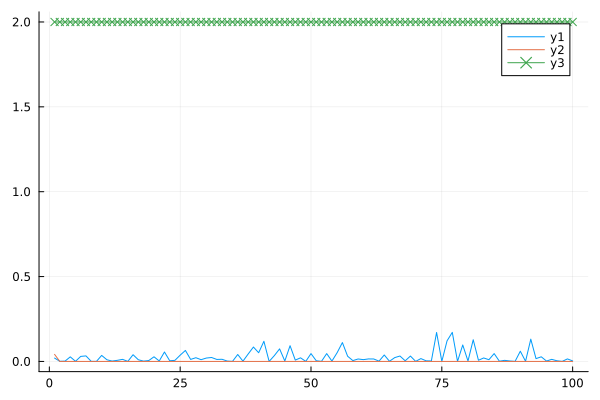

In [49]:
plot(exp.(FB.loglikelihoods[:,1:100])')
plot!(z[1:100], marker=:x)

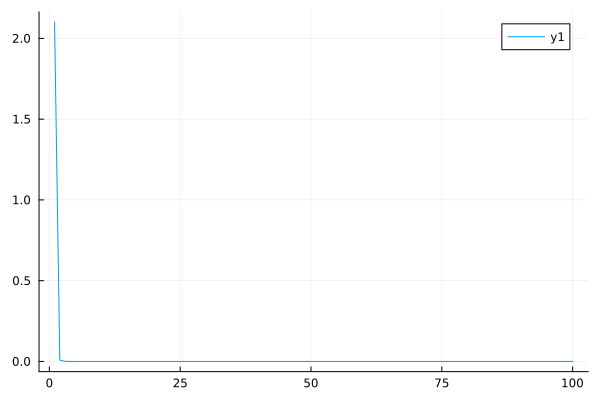

In [50]:
plot(param_diff)